In [41]:
import numpy as np
import pandas as pd

In [42]:
df = pd.read_csv('test.csv')

In [43]:
df.head()

,id,id_user,id_article,rating,Article
0,1,1,1,3,Item0
1,2,2,1,0,Item0
2,3,3,1,0,Item0
3,4,4,1,1,Item0
4,5,1,2,2,Item1


In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
%matplotlib inline

In [45]:
df.groupby('Article')['rating'].mean().sort_values(ascending=False).head()

Article
Item7     3.50
Item1     2.75
Item5     2.75
Item11    2.25
Item9     2.25
Name: rating, dtype: float64

In [46]:
df.groupby('Article')['rating'].count().sort_values(ascending=False).head()

Article
Item0     4
Item1     4
Item10    4
Item11    4
Item2     4
Name: rating, dtype: int64

In [47]:
ratings = pd.DataFrame(df.groupby('Article')['rating'].mean())
ratings.head()

,rating
Article,
Item0,1.00
Item1,2.75
Item10,1.50
Item11,2.25
Item2,1.75


In [48]:
ratings['num of ratings'] = pd.DataFrame(df.groupby('Article')['rating'].count())
ratings.head()

,rating,num of ratings
Article,,
Item0,1.00,4
Item1,2.75,4
Item10,1.50,4
Item11,2.25,4
Item2,1.75,4


<AxesSubplot:>

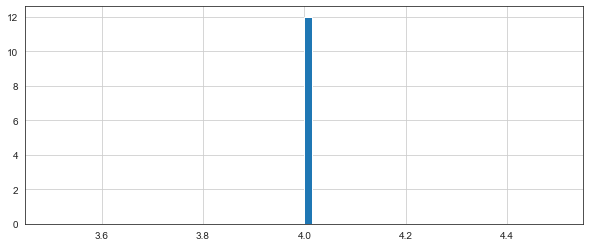

In [49]:
plt.figure(figsize=(10,4))
ratings['num of ratings'].hist(bins=70)

<AxesSubplot:>

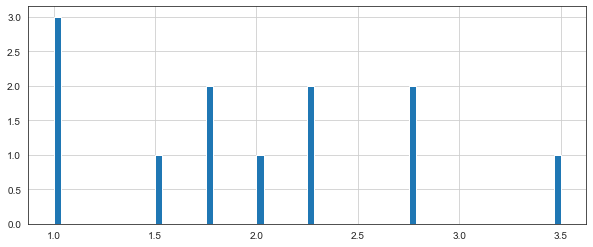

In [50]:
plt.figure(figsize=(10,4))
ratings['rating'].hist(bins=70)

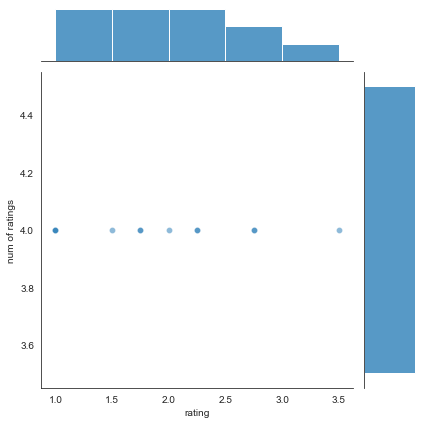

In [51]:
sns.jointplot(x='rating',y='num of ratings',data=ratings,alpha=0.5)

In [52]:
moviemat = df.pivot_table(index='id_user',columns='id_article',values='rating')
moviemat.head()

id_article,1,2,3,4,5,6,7,8,9,10,11,12
id_user,,,,,,,,,,,,
1,3,2,0,0,4,2,2,4,0,4,0,4
2,0,2,1,3,0,4,1,2,1,1,2,0
3,0,3,2,0,3,3,2,4,0,0,1,1
4,1,4,4,1,0,2,3,4,3,4,3,4


In [53]:
ratings.sort_values('num of ratings',ascending=False).head(10)

,rating,num of ratings
Article,,
Item0,1.00,4
Item1,2.75,4
Item10,1.50,4
Item11,2.25,4
Item2,1.75,4
Item3,1.00,4
Item4,1.75,4
Item5,2.75,4
Item6,2.00,4


In [54]:
item0 = moviemat[1]
item0.head()

id_user
1    3
2    0
3    0
4    1
Name: 1, dtype: int64

In [55]:
similar_to_item0 = moviemat.corrwith(item0)
#similar_to_item1 = moviemat.corrwith(item9)

In [56]:
corr_item0 = pd.DataFrame(similar_to_item0,columns=['Correlation'])
corr_item0.dropna(inplace=True)
corr_item0.head()

,Correlation
id_article,
1,1.000000
2,-0.246183
3,-0.414039
4,-0.500000
5,0.571662


In [57]:
corr_item0.sort_values('Correlation',ascending=False).head(10)

,Correlation
id_article,
1,1.000000
10,0.800327
12,0.800327
5,0.571662
8,0.471405
7,0.288675
9,-0.166667
2,-0.246183
3,-0.414039


In [58]:
corr_item0 = corr_item0.join(ratings['num of ratings'])
corr_item0.head()

,Correlation,num of ratings
id_article,,
1,1.000000,NaN
2,-0.246183,NaN
3,-0.414039,NaN
4,-0.500000,NaN
5,0.571662,NaN


In [59]:
corr_item0[corr_item0['num of ratings']>0].sort_values('Correlation',ascending=False).head()

,Correlation,num of ratings
id_article,,
